# Calculate distances between specific residues in pdb files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
from os.path import exists
from biopandas.pdb import PandasPdb

def sanitize_protein(protein_id):
    "Replace / in protein ID with _ for compatibility with file system"
    return protein_id.replace("/", "_")

def calculate_dist(pdb, XL):
    "Calculate the distance between residues in the PDB based on the crosslink"
    # Find the C atom for each residue
    res_1 = pdb.loc[pdb['residue_number'] == XL.Res1]
    res_2 = pdb.loc[pdb['residue_number'] == XL.Res2]
    
    res_1_coords = res_1[['x_coord', 'y_coord', 'z_coord']].to_numpy()
    res_2_coords = res_2[['x_coord', 'y_coord', 'z_coord']].to_numpy()
    
    return np.linalg.norm(res_1_coords - res_2_coords)

In [2]:
# Read in XL csv file to pandas DF
XLs = pd.read_csv("Union_XL1_XL2_PurifiedSECa-g_IEXcilia2inject2.3-newpeptidepos.csv", encoding= 'unicode_escape')

# Save all intramolecular crosslinks to a new DF
XLs_intra = XLs.loc[XLs['Protein1'] == XLs['Protein2']]

# Calculate the XL position in the protein primary sequence
XLs_intra['Res1'] = XLs_intra['PepPos1'] + XLs_intra['LinkPos1'] - 1
XLs_intra['Res2'] = XLs_intra['PepPos2'] + XLs_intra['LinkPos2'] - 1

# Removes all XL redundancies 
XLs_intra['newRes1'] = XLs_intra[["Res1", "Res2"]].max(axis=1)
XLs_intra['newRes2'] = XLs_intra[["Res1", "Res2"]].min(axis=1)
XLs_intra_nonred = XLs_intra.drop_duplicates(subset=['Protein1', 'Protein2', 'newRes1', 'newRes2'], keep="last")

C:\Users\Erin\AppData\Local\Temp/ipykernel_13832/2994176413.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XLs_intra['Res1'] = XLs_intra['PepPos1'] + XLs_intra['LinkPos1'] - 1
C:\Users\Erin\AppData\Local\Temp/ipykernel_13832/2994176413.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  XLs_intra['Res2'] = XLs_intra['PepPos2'] + XLs_intra['LinkPos2'] - 1
C:\Users\Erin\AppData\Local\Temp/ipykernel_13832/2994176413.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [3]:
# Inspection of a specific protein 
XLs_intra_nonred.loc[XLs_intra_nonred['Protein1'] == 'PRKG1']

,Id,Score,Protein1,PepPos1,PepSeq1,LinkPos1,Protein2,PepPos2,PepSeq2,LinkPos2,Res1,Res2,newRes1,newRes2
7149,7150,153.24,PRKG1,211,KTIEDMVQK,1,PRKG1,637,QGKHPGR,3,211,639,639,211
8914,8915,137.84,PRKG1,469,KMANLEDK,1,PRKG1,477,KDYSHIK,1,469,477,477,469
8927,8928,137.80,PRKG1,786,LVINEIKHEQEKGK,12,PRKG1,492,KLGFGQFGSVYLVR,1,797,492,797,492
9230,9231,135.02,PRKG1,212,TIEDMVQKNYEANR,8,PRKG1,634,ILKQGK,3,219,636,636,219
9383,9384,133.90,PRKG1,226,TFMEQVNFFKSMNSEQK,10,PRKG1,637,QGKHPGR,3,235,639,639,235
10661,10662,121.68,PRKG1,435,TDGVISSISYKTFQK,11,PRKG1,365,ITNNCKIANLK,6,445,370,445,370
11540,11541,113.72,PRKG1,721,LIDQLLSKVPELR,8,PRKG1,325,DNLTKILGDK,5,728,329,728,329
11692,11693,112.13,PRKG1,236,SMNSEQKDSIASALINIK,7,PRKG1,346,WSFAKSDLLK,5,242,350,350,242
11739,11740,111.63,PRKG1,293,GDSFGEQALYVSSKR,14,PRKG1,275,EGTVSVWKDKK,8,306,282,306,282
12117,12118,107.19,PRKG1,506,NKDSGALYALK,2,PRKG1,477,KDYSHIK,1,507,477,507,477


In [4]:
# Takes the first 100 most crosslinked proteins
intra_XL_counts = XLs_intra_nonred['Protein1'].value_counts().reset_index().rename(columns = {'index': 'Protein1', 'Protein1': 'XL_count'})
intra_XL_counts[:100]

,Protein1,XL_count
0,DYH4,63
1,SPATA5,56
2,DYH3,50
3,DYH5,42
4,PRKG1,38
...,...,...
95,SPEF2,9
96,DPY30-1,9
97,Q24FH6,9
98,I7MCM4,9


In [5]:
def get_af_XL_counts(protein_XL_counts, threshold):
    protein = protein_XL_counts['Protein1']
    
    protein_XLs = XLs_intra_nonred.loc[XLs_intra_nonred['Protein1'] == protein]
    #print(protein_XLs)
    
    pdb_filepath = 'models/' + sanitize_protein(protein) + '-unrelaxed_model_1.pdb'
    if (not exists(pdb_filepath)):
        print(protein + ' PDB file not found. Skipping...')
        return None
    
    ppdb = PandasPdb().read_pdb(pdb_filepath) # reads pdb into pandas df
    pdbatom = ppdb.df['ATOM'] # extracts only the atom data type from pdb
    subpdb = pdbatom[(pdbatom['atom_name']=='CA')] # selects the only the CA atoms
    #print(subpdb)

    protein_XLs['af_distance'] = protein_XLs.apply(lambda x : calculate_dist(subpdb, x), axis=1)
    #print(protein_XLs)
    #print(protein_XLs[protein_XLs['af_distance'] < threshold])
    
    return protein_XLs[protein_XLs['af_distance'] < 30].count()['Id']

In [6]:
intra_XL_counts['af_XL_count'] = intra_XL_counts.apply(lambda x : get_af_XL_counts(x, 30), axis = 1)

DYH4 PDB file not found. Skipping...
SPATA5 PDB file not found. Skipping...
DYH3 PDB file not found. Skipping...
DYH5 PDB file not found. Skipping...
CFAP45 PDB file not found. Skipping...
DYH7 PDB file not found. Skipping...
EMAP5/6-1 PDB file not found. Skipping...
EMAP5/6-2 PDB file not found. Skipping...
EFhand-2 PDB file not found. Skipping...
TUBA PDB file not found. Skipping...
IFT139 PDB file not found. Skipping...
EFHC1/2-2 PDB file not found. Skipping...
DYH15 PDB file not found. Skipping...
DYH6 PDB file not found. Skipping...
HSP70 PDB file not found. Skipping...
SPAG17 PDB file not found. Skipping...
IFT122 PDB file not found. Skipping...
IFT144 PDB file not found. Skipping...
EPA1 PDB file not found. Skipping...
CFAP53 PDB file not found. Skipping...
IDP2  PDB file not found. Skipping...
UBXN2A/B PDB file not found. Skipping...
IFT81 PDB file not found. Skipping...
HYDIN PDB file not found. Skipping...
DYH30 PDB file not found. Skipping...
IFT121 PDB file not found. Skipp

GST58 PDB file not found. Skipping...
Q24DQ7 PDB file not found. Skipping...
CCP1 PDB file not found. Skipping...
BBC37 PDB file not found. Skipping...
Q24D45 PDB file not found. Skipping...
CCDC81-2 PDB file not found. Skipping...
WDR34 PDB file not found. Skipping...
CMBL PDB file not found. Skipping...
CHDC2-1 PDB file not found. Skipping...
I7M303 PDB file not found. Skipping...
I7M2G7 PDB file not found. Skipping...
RSPH9 PDB file not found. Skipping...
I7M917 PDB file not found. Skipping...
Q22E45 PDB file not found. Skipping...
I7M9I4 PDB file not found. Skipping...
Q22XV3 PDB file not found. Skipping...
I7LZX2 PDB file not found. Skipping...
Q24CY1 PDB file not found. Skipping...
KIN1 PDB file not found. Skipping...
W7XLR7 PDB file not found. Skipping...
I7MJJ4 PDB file not found. Skipping...
DRC10 PDB file not found. Skipping...
I7LWH9 PDB file not found. Skipping...
I7MHB1 PDB file not found. Skipping...
W7XHC6 PDB file not found. Skipping...
KIF6 PDB file not found. Skipping

Q24GJ3 PDB file not found. Skipping...
I7LV62 PDB file not found. Skipping...
MRNO31 PDB file not found. Skipping...
Q23R64 PDB file not found. Skipping...
SPATA4 PDB file not found. Skipping...
A4VE68 PDB file not found. Skipping...
Q23E22 PDB file not found. Skipping...
I7M103 PDB file not found. Skipping...
Q247Y5 PDB file not found. Skipping...
Q23QZ6 PDB file not found. Skipping...
Q23EE7 PDB file not found. Skipping...
I7M5Z1 PDB file not found. Skipping...
ARMC9-2 PDB file not found. Skipping...
W7WZC8 PDB file not found. Skipping...
I7MCZ9 PDB file not found. Skipping...
A4VCZ9 PDB file not found. Skipping...
Q23QZ4 PDB file not found. Skipping...
Q247W3 PDB file not found. Skipping...
Q241B3 PDB file not found. Skipping...
Q22Y01 PDB file not found. Skipping...
I7MEB2 PDB file not found. Skipping...
I7M0Q0 PDB file not found. Skipping...
Q23D05 PDB file not found. Skipping...
DAW1/PRPF4 PDB file not found. Skipping...
Q23G42 PDB file not found. Skipping...
I7MMZ6 PDB file not 

In [7]:
intra_XL_counts[intra_XL_counts['af_XL_count'].notnull()]

,Protein1,XL_count,af_XL_count
4,PRKG1,38,36.0
5,EEF2,35,25.0
6,MRNC57,34,25.0
10,I7MJ59,30,15.0
11,BBC118,25,15.0
...,...,...,...
120,I7LW80,8,8.0
121,I7LZI8,7,6.0
123,I7MEJ5,7,7.0
128,I7MHD4,7,7.0


In [8]:
len(intra_XL_counts[intra_XL_counts['af_XL_count'].notnull()])

89

## Compare Confidence and XL Agreement

In [9]:
def read_confidence(intra_XL_counts):
    protein = intra_XL_counts['Protein1']
    
    ranking_filepath = 'rankings/' + sanitize_protein(protein) + '-ranking_debug.json'
    if (not exists(ranking_filepath)):
        print(protein + ' ranking file not found. Skipping...')
        return None
    
    with open(ranking_filepath) as ranking_file:
        ranking_debug = json.load(ranking_file)
        return ranking_debug['plddts']['model_1']

intra_XL_counts['confidence'] = intra_XL_counts.apply(lambda x : read_confidence(x), axis = 1)
intra_XL_counts[intra_XL_counts['af_XL_count'].notnull()]

DYH4 ranking file not found. Skipping...
SPATA5 ranking file not found. Skipping...
DYH3 ranking file not found. Skipping...
DYH5 ranking file not found. Skipping...
CFAP45 ranking file not found. Skipping...
DYH7 ranking file not found. Skipping...
EMAP5/6-1 ranking file not found. Skipping...
EMAP5/6-2 ranking file not found. Skipping...
EFhand-2 ranking file not found. Skipping...
TUBA ranking file not found. Skipping...
IFT139 ranking file not found. Skipping...
EFHC1/2-2 ranking file not found. Skipping...
DYH15 ranking file not found. Skipping...
DYH6 ranking file not found. Skipping...
CAPN-1 ranking file not found. Skipping...
HSP70 ranking file not found. Skipping...
SPAG17 ranking file not found. Skipping...
IFT122 ranking file not found. Skipping...
IFT144 ranking file not found. Skipping...
EPA1 ranking file not found. Skipping...
CFAP53 ranking file not found. Skipping...
IDP2  ranking file not found. Skipping...
UBXN2A/B ranking file not found. Skipping...
IFT81 ranking f

,Protein1,XL_count,af_XL_count,confidence
4,PRKG1,38,36.0,78.041609
5,EEF2,35,25.0,89.479929
6,MRNC57,34,25.0,68.385990
10,I7MJ59,30,15.0,67.924191
11,BBC118,25,15.0,85.481704
...,...,...,...,...
120,I7LW80,8,8.0,68.536852
121,I7LZI8,7,6.0,97.085454
123,I7MEJ5,7,7.0,80.420044
128,I7MHD4,7,7.0,95.693012


In [10]:
intra_XL_counts['XL_agreement'] = intra_XL_counts['af_XL_count'] / intra_XL_counts['XL_count']
intra_XL_counts[intra_XL_counts['af_XL_count'].notnull()]

,Protein1,XL_count,af_XL_count,confidence,XL_agreement
4,PRKG1,38,36.0,78.041609,0.947368
5,EEF2,35,25.0,89.479929,0.714286
6,MRNC57,34,25.0,68.385990,0.735294
10,I7MJ59,30,15.0,67.924191,0.500000
11,BBC118,25,15.0,85.481704,0.600000
...,...,...,...,...,...
120,I7LW80,8,8.0,68.536852,1.000000
121,I7LZI8,7,6.0,97.085454,0.857143
123,I7MEJ5,7,7.0,80.420044,1.000000
128,I7MHD4,7,7.0,95.693012,1.000000


<AxesSubplot:xlabel='XL_agreement', ylabel='confidence'>

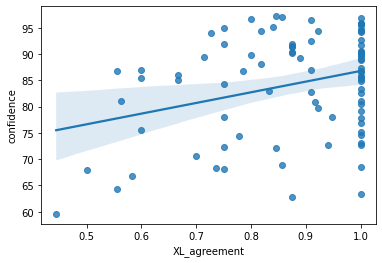

In [11]:
sns.regplot(x = intra_XL_counts['XL_agreement'], y = intra_XL_counts['confidence'])